In [1]:
import ir_datasets
import pandas as pd

dataset = ir_datasets.load("cord19")

data = []

for doc in dataset.docs_iter()[:20000]:  
 
    data.append({
        "doc_id": doc.doc_id,
        "title": doc.title,
        "doi": doc.doi,
        "date": doc.date,
        "abstract": doc.abstract
    })

df = pd.DataFrame(data)
df.to_csv("covid_dataset.csv", index=False)

print("Dataset saved to covid_dataset.csv")

Dataset saved to covid_dataset.csv


## Data Sources

### Description

The [COVID-19 Open Research Dataset (CORD-19)](https://github.com/allenai/cord19) is a freely available resource of over 1,000,000 scholarly articles about COVID-19, SARS-CoV-2, and related coronaviruses. The dataset was developed by the Allen Institute for AI in collaboration with several organizations, including the White House, NIH, and leading research groups. Its goal is to facilitate the development of new tools and technologies to help researchers find relevant information about the virus and its spread, and to support the global research community in the fight against the pandemic. It was first published in March 2020 and has been updated weekly since then until May 2nd 2022.

### Characteristics

The dataset can be obtained in various formats, including JSON, CSV. It contains metadata for each article, such as the id of the document, title, abstract, publication date. It has about 193,000 articles with a total size of 3.7GB since it uses the version of 16-07-2020. Some of these articles have missing abstracts or share the same title. This can happen because the dataset is a collection of articles from different sources, and some of them may have been published in more than one place.

## Characterization 

In [2]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') 

import spacy

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Text Analysis

In [3]:
from string import punctuation

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df = df[df["abstract"] != ""]
stop_words = stopwords.words('english')

np = [
    ''.join([char for char in abs if char not in punctuation])
    for abs in df["abstract"]
]
print(np[:5])

token_abs = [word_tokenize(abs) for abs in np]
print(token_abs[:5])

abs_nstp = [
    ' '.join([word for word in abs if word.lower() not in stop_words])
    for abs in token_abs
]
print(abs_nstp[:5])

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
abs_lem = [
    ' '.join([lemmatizer.lemmatize(word) for word in abs.split()])
    for abs in abs_nstp
]
print(abs_lem[:5])

df['lem_abstract'] = abs_lem

df.to_csv("covid_dataset_preprocessed.csv", index=False)


['OBJECTIVE This retrospective chart review describes the epidemiology and clinical features of 40 patients with cultureproven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital Jeddah Saudi Arabia METHODS Patients with positive M pneumoniae cultures from respiratory specimens from January 1997 through December 1998 were identified through the Microbiology records Charts of patients were reviewed RESULTS 40 patients were identified 33 825 of whom required admission Most infections 925 were communityacquired The infection affected all age groups but was most common in infants 325 and preschool children 225 It occurred yearround but was most common in the fall 35 and spring 30 More than threequarters of patients 775 had comorbidities Twentyfour isolates 60 were associated with pneumonia 14 35 with upper respiratory tract infections and 2 5 with bronchiolitis Cough 825 fever 75 and malaise 588 were the most common symptoms and crepitations 60 and wheezes 40 were the mo

### Word Cloud

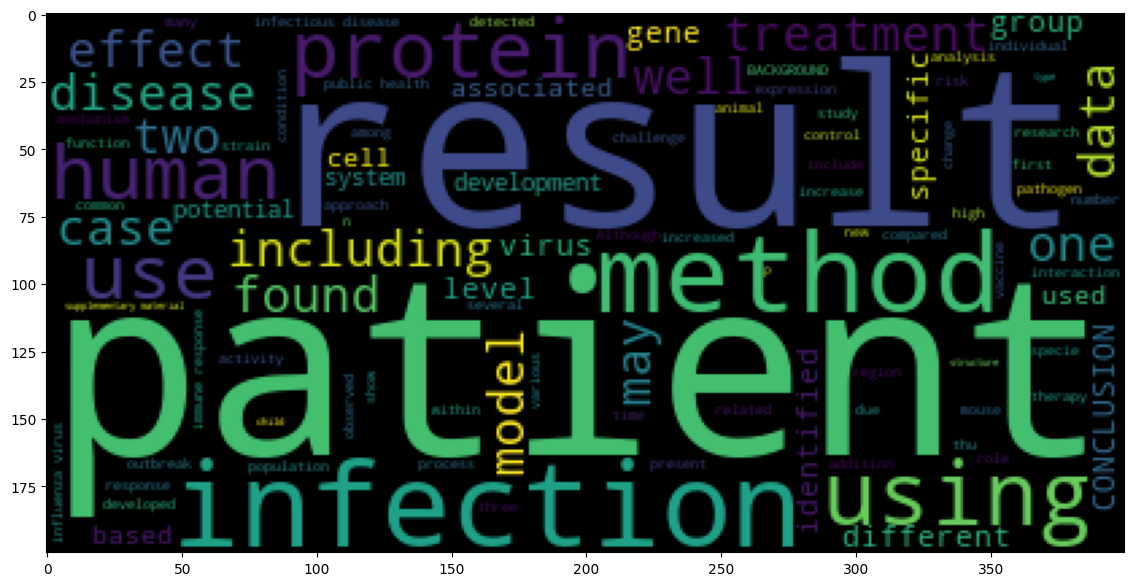

In [4]:
import numpy as np
from wordcloud import WordCloud

import matplotlib.pyplot as plt

wc = WordCloud(
    background_color='black',
    max_words=100,
    random_state=44,
    max_font_size=110
)
wc.generate(' '.join(df['lem_abstract']))
plt.figure(figsize=(50, 7))
plt.imshow(wc)
plt.show()





### Name Entity Recognition

In [ ]:
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df['entities'] = df['lem_abstract'].apply(lambda x: extract_entities(str(x)))
print(df[['entities']].head())

from spacy import displacy

displacy.render(nlp(df['lem_abstract'].iloc[0]), style='ent', jupyter=True)
## verificar sci-spacy para melhorar a extração de entidades nomeadas